# Comparing LLoyd’s algorithm and Projection-based Clustering

   You are to make calls to LLoyd’s algorithm to cluster data, with and without projection. You are given a function data generator(seed, n, dim) that generates n samples from a mixture of 3 Gaussian distributions in dimension dim = 9. The parameter seed specifies the seed used for random sampling. The function returns two numpy arrays “datapoints, labels”, i.e., the generated samples and their true labels in {0, 1, 2} indicating Gaussian components (modeling clusters).

In [1]:
import numpy as np
dim = 9

def data_generator(seed, n, dim):
    mu1 = [1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0]
    mu2 = [0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1]
    mu3 = [0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0]
    np.random.seed(seed)
    datapoints = np.zeros((n, dim))
    labels = np.zeros(n)
    for i in range (n):
        rand_int = np.random.choice([1, 2, 3])
        if rand_int == 1:
            datapoints[i] = np.random.multivariate_normal(mu1, 
                                                           np . diag ([1 , 1 , 1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1]))
        labels [i] = rand_int
        if rand_int == 2:
            datapoints[i] = np . random . multivariate_normal(mu2,
                                                               np . diag ([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 1 , 1 , 1]))
            labels [i] = rand_int
        else :
            datapoints[i] = np.random.multivariate_normal(mu3, 
                                                          np . diag ([0.1 , 0.1 , 0.1 , 1 , 1 , 1 , 0.1 , 0.1 , 0.1]) )
            labels [i] = rand_int
    return datapoints, labels

In the rest of the problem, we will explore the effect of PCA on clustering performance.

(a) For each n (the number of samples) taking values in 100, 200, 300, ..., 1000, generate 5
datasets of size n using data generator(seed, n, dim), with a different seed each time (for
example seed ∈ [1, 2, 3, 4, 5]). Cluster each datasets using LLoyd’s algorithm, with 3 clusters
(K = 3), and calculate the Rand Index. Plot the average Rand Index (over the 5 datasets
Page 3
for each value of n) against the different values of n with error bars (corresponding to the
standard deviation of Rand Index for each n).
Hint : you can use sklearn.cluster.KMeans to run LLoyd’s algorithm and
sklearn.metrics.adjusted rand score() to calculate the Rand Index.


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
final_avg=[]
final_std=[]

for n in range(100, 1001, 100):
    sum_score = 0
    total_score =[]
    for seed in range(1,6,1):
        data = data_generator(seed, n, dim)
        kmeans = KMeans(3).fit(data[0])
        sum_score += adjusted_rand_score(data[1], kmeans.labels_ + 1)
        total_score.append(adjusted_rand_score(data[1], kmeans.labels_ + 1))
    #calculate mean
    avg_score = sum_score / 5
    #calculate standard deviation    
    standard_dev = np.std(total_score)

    final_avg.append(avg_score)
    final_std.append(standard_dev)
    
print(final_avg)
print(final_std)

[0.4167044585986336, 0.3454737448257458, 0.3352167307902846, 0.34798166016752263, 0.3489091214160293, 0.32809470207987934, 0.32425120949637426, 0.32141870973839726, 0.3200897974397553, 0.3202952628051949]
[0.10444737719611014, 0.06649863267936237, 0.05101912145265961, 0.031606291001959906, 0.0436112554519151, 0.0425909024262799, 0.029797402689352524, 0.025268467394440594, 0.025428141226196715, 0.025498466282656406]


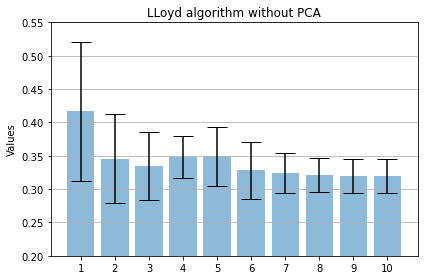

In [4]:
labels = ['1', '2', '3','4','5','6','7','8','9','10']
x_pos = np.arange(len(labels))
CTEs = final_avg
error = final_std

import matplotlib.pyplot as plt
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Values')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('LLoyd algorithm without PCA')
ax.yaxis.grid(True)
ax.set_ylim(0.2,0.55)

plt.tight_layout()
plt.show()

(b) Now, perform the same analysis but project each dataset onto its 3 Principal Components
before running LLoyd’s algorithm. Again, plot the average Rand Index against the different
values of n with error bars.

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

final_avg=[]
final_std=[]
scaler = StandardScaler()

for n in range(100, 1001, 100):
    sum_score = 0
    total_score =[]
    for seed in range(1,6,1):
        data = data_generator(seed, n, dim)
        df_transform = StandardScaler().fit_transform(data[0])
        pca = PCA(n_components=3).fit(df_transform)
        new_df = pca.transform(df_transform)
        kmeans=KMeans(3).fit(new_df)
        sum_score += adjusted_rand_score(data[1], kmeans.labels_ + 1)
        total_score.append(adjusted_rand_score(data[1], kmeans.labels_ + 1))
    #calculate mean
    avg_score = sum_score / 5
    #calculate standard deviation    
    standard_dev = np.std(total_score)
    
    final_avg.append(avg_score)
    final_std.append(standard_dev)
    
print(final_avg)
print(final_std)

[0.38749272223568054, 0.3741014945184661, 0.34992185159533207, 0.3808128429953718, 0.3952599108806051, 0.39749305275019003, 0.3907789251413896, 0.394954861241522, 0.38715890524361946, 0.3909245311847218]
[0.04484334227387046, 0.08391853174823932, 0.05693769936759389, 0.048164801145888905, 0.025205682912478513, 0.026817349974953386, 0.025562840428348152, 0.027033095822302747, 0.02547985893985477, 0.016051815170043258]


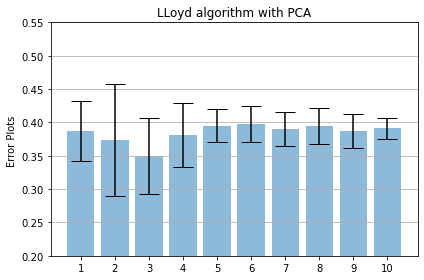

In [6]:
labels = ['1', '2', '3','4','5','6','7','8','9','10']
x_pos = np.arange(len(labels))
CTEs = final_avg
error = final_std

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Error Plots ')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('LLoyd algorithm with PCA')
ax.yaxis.grid(True)
ax.set_ylim(0.2,0.55)

plt.tight_layout()
plt.show()

(c) Superimpose the two plots to compare the performances of LLoyd’s algorithm with and
without projecting the data. What can you say about the performances of both methods?
How do the standard deviations on performance (Rand Index) compare?

In the PCA graph, the rand index is more variate when there is no pca. the data after pca shows a stable trend.

Problem 8: Comparing K-means (Lloyd’s), Meanshift and Spectral Clustering on synthetic data

We will compare various clustering methods on the three data sets shown in the scatterplots
below. Use Scikit-learn module in python to import Meanshift, K-means and Spectral Clustering algorithms. (for more information, please refer to tutorials on Sklearn.cluster.Meanshift, Sklearn.cluster.Kmeans and Sklearn.cluster.spectralclustering.


In [7]:
from sklearn . cluster import MeanShift , KMeans , SpectralClustering

In [8]:
import random
import math
import numpy as np

random . seed ( 0 )
## Data set 1
X1 = []
for i in range ( 1000 ):
    theta = random.uniform (0 , 2* math.pi)
    radius = random.gauss (0, 0.2 )+ random.choice ([1 , 3])
    X1.append([radius * math.cos(theta), radius*math.sin(theta)])
X1 = np.array (X1)

    ## Data Set 2
X2 = []
for i in range ( 1000 ):
    theta = random.uniform (0 , 2* math.pi)
    radius = random.gauss (0 , 0.1 ) + 2
    if theta < math.pi:
        X2.append ([ radius * math . cos( theta )-1 , radius * math . sin( theta )])
    else :
        X2.append ([ radius * math . cos( theta )+1 , radius * math . sin( theta )])
X2 = np.array (X2)

## Data Set 3
X3 = []
for i in range (1000):
    radius = random . gauss (0,1)
    theta = random . uniform (0,2* math.pi)
    center = random . choice ([[0,1],[3 , 3],[1 ,-3]])
    X3.append ([ radius * math . cos( theta )+ center [0], radius * math . sin( theta )+ center
    [1]])
X3 = np . array ( X3 )

For each of the questions below, you should display the resulting clustering as a scatter plots with
different colors for each cluster (see code below).

(a) Run K-means on the 3 datasets. Why does it perform well or worse on some datasets?

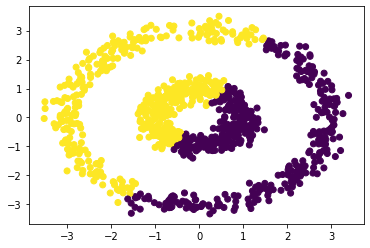

In [9]:
kmeans = KMeans(2).fit(X1)
y_kmeans = kmeans.predict(X1)

import matplotlib.pyplot as plt
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans)

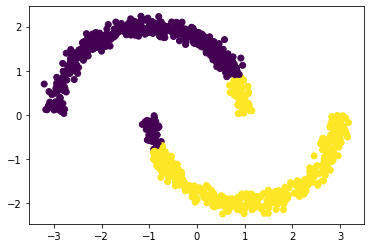

In [10]:
kmeans = KMeans(2).fit(X2)
y_kmeans = kmeans.predict(X2)

import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans)

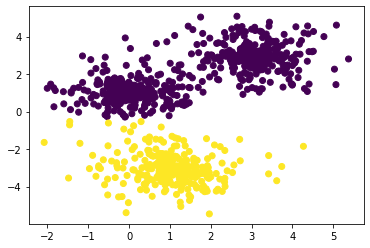

In [11]:
kmeans = KMeans(2).fit(X3)
y_kmeans = kmeans.predict(X3)

import matplotlib.pyplot as plt
plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans)

The K-means for last graph is much more better than other two. It could be the distribution of the data. Therefore, K-means is more suitable to predict for data distribution that like X3.

(b) Run meanshift on the 3 datasets. Why does it perform well or worse on some datasets?

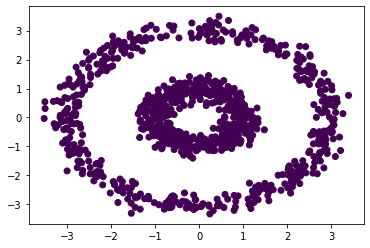

In [12]:
from sklearn.cluster import estimate_bandwidth
band1=estimate_bandwidth(X1, quantile=0.2)
clustering= MeanShift(bandwidth=band1).fit(X1)
plt.scatter(X1[:, 0], X1[:, 1], c=clustering.labels_)

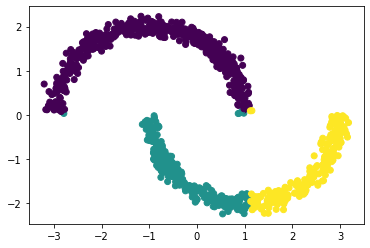

In [13]:
band2=estimate_bandwidth(X2, quantile=0.2)
clustering= MeanShift(bandwidth=band2).fit(X2)
plt.scatter(X2[:, 0], X2[:, 1], c=clustering.labels_)

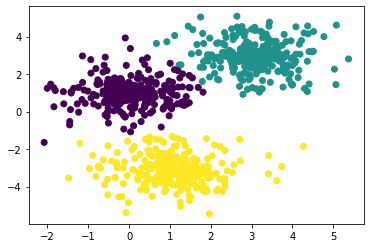

In [14]:
band3=estimate_bandwidth(X3, quantile=0.2)
clustering= MeanShift(bandwidth=band3)
labels = clustering.fit_predict(X3) 
plt.scatter(X3[:, 0], X3[:, 1], c=clustering.labels_)

(c) Run Spectral clustering on the 3 datasets. Why does it perform well or worse on some
datasets?


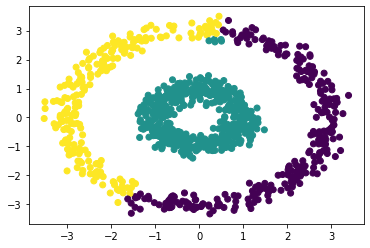

In [15]:
spectral_model1 = SpectralClustering(n_clusters = 3) 
labels_1 = spectral_model1.fit_predict(X1) 
plt.scatter(X1[:, 0], X1[:, 1], c=labels_1)

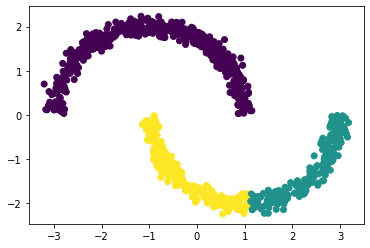

In [16]:
spectral_model2 = SpectralClustering(n_clusters = 3) 
labels_2 = spectral_model2.fit_predict(X2) 
plt.scatter(X2[:, 0], X2[:, 1], c=labels_2)

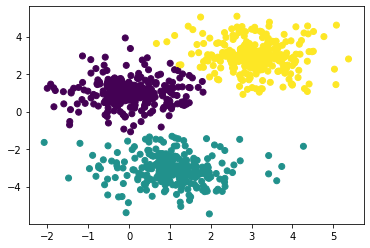

In [17]:
spectral_model3 = SpectralClustering(n_clusters = 3) 
labels_3 = spectral_model3.fit_predict(X3) 
plt.scatter(X3[:, 0], X3[:, 1], c=labels_3)

This is a better clustering for graph 1. It seems that it performs well on every graphs.